## IV characteristics measurement at room temperature with 100M ohm resistor connected between pin 1&2

## Data acquisition with NIDAQ

In [4]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()
    

# Time averaging and plotting
Applied bias = 0 V

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


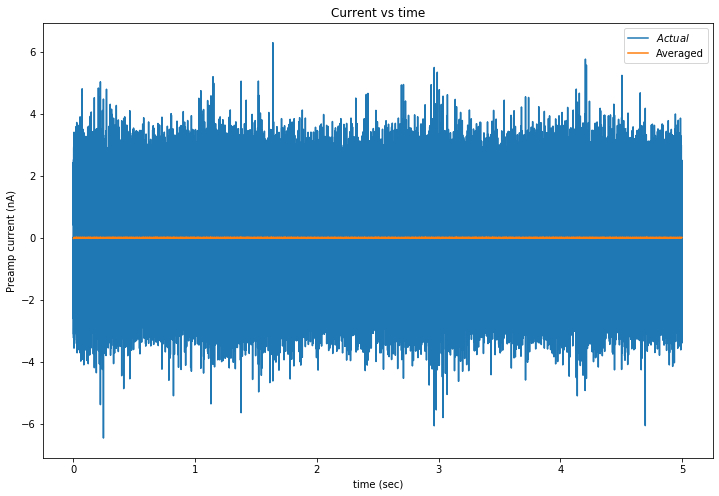

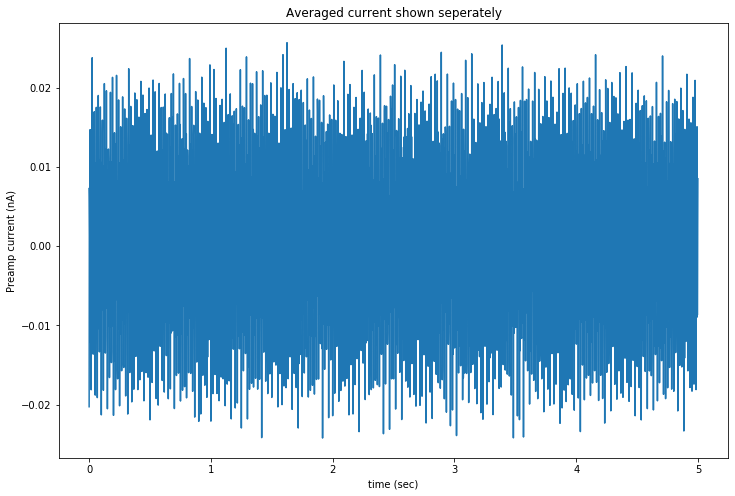

In [5]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

                 Observation: 200 times smaller in range compared to the original one
                 

## Frequency response comparison
Applied bias = 0 V

Text(0.5, 1.0, 'Frequency response of the actual signal')

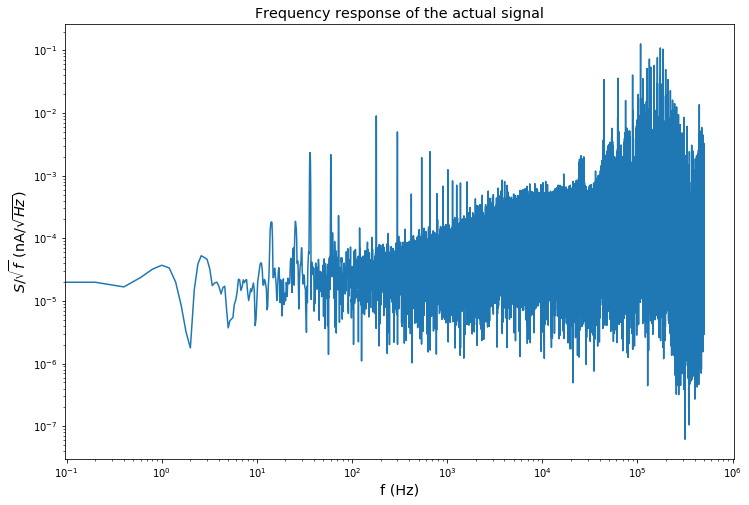

In [23]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

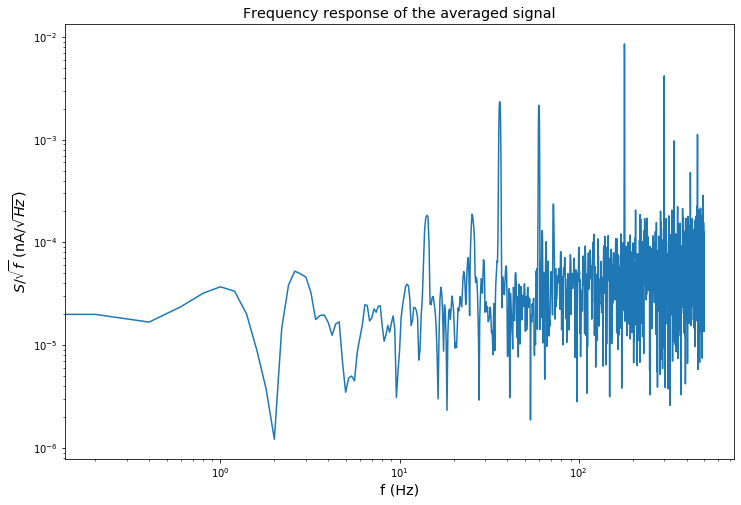

In [24]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

## plotting them together

Text(0.5, 1.0, 'Frequency response')

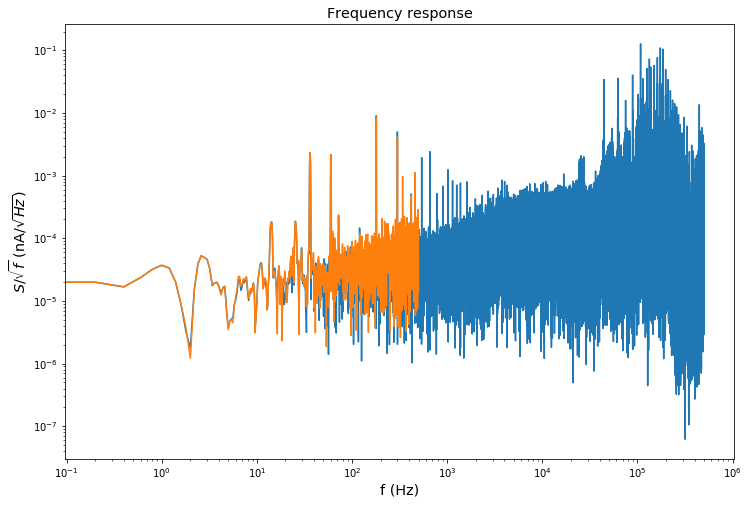

In [27]:
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response',fontsize='x-large')

## Observation
No difference is noted.
Different frequncy range is due to differnt sampling frequencies: <br>
$F_{s,actual} / 2 = 0.5$ MHz and $F_{s,averaged}/2 = 500$ Hz <br>
<br>

$\textbf{Note}:$ The averaging windows have no overlap. Let's see what happens when we take a moving average with overlapping windows.

## Moving average with 50% overlap

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


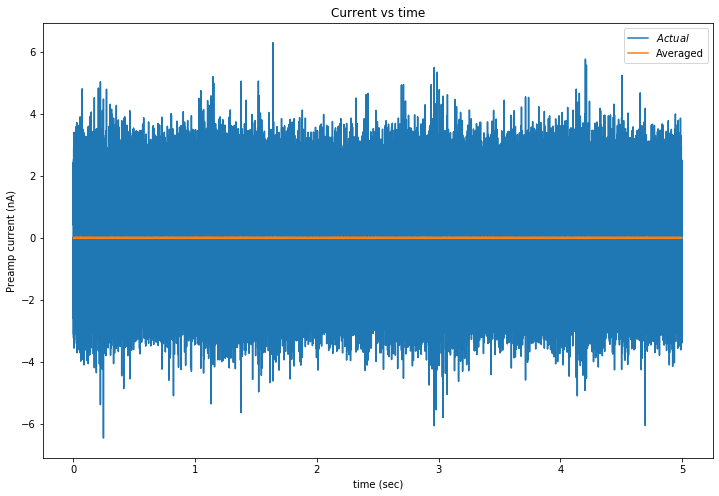

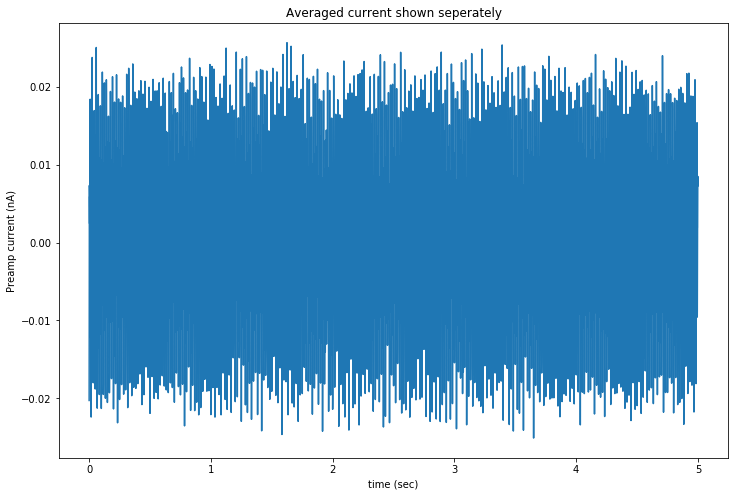

In [30]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
overlap_factor = int(2)  # 1/overlap_percentage
ns_desired = int(rs_desired*t_acqu*overlap_factor) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/(overlap_factor*rs_desired))
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[int(overlap*index*n_pointstoaverage):int((overlap*index+1)*n_pointstoaverage)].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

Frequecy response

Text(0.5, 1.0, 'Frequency response of the actual signal')

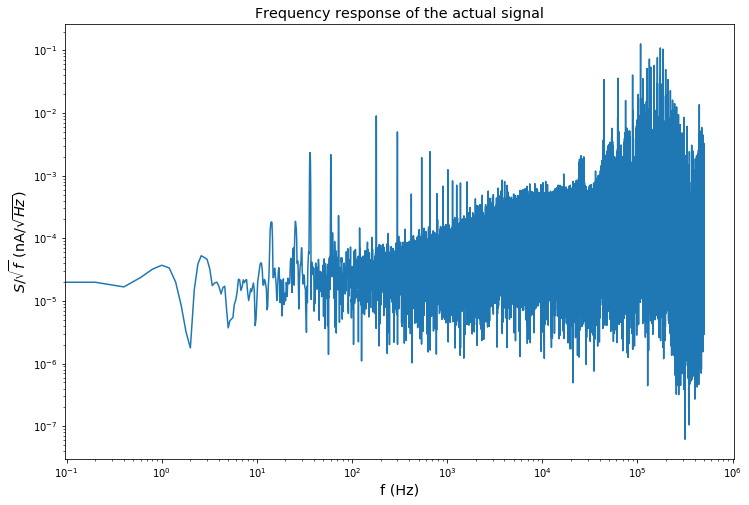

In [31]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

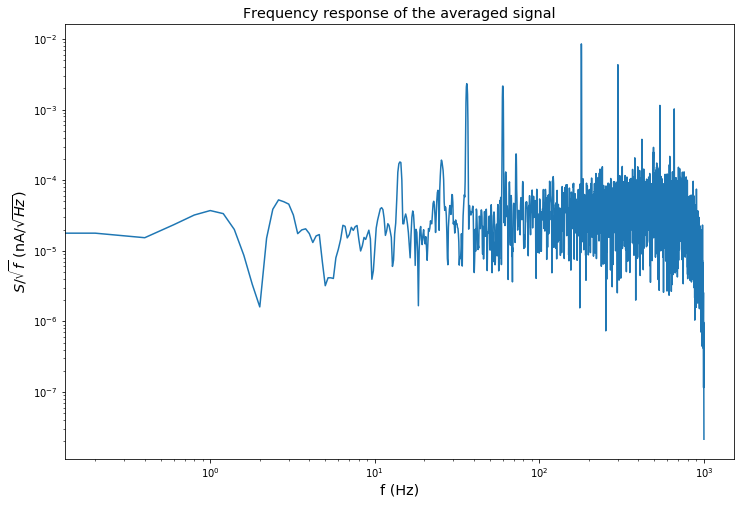

In [32]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=overlap_factor*rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response')

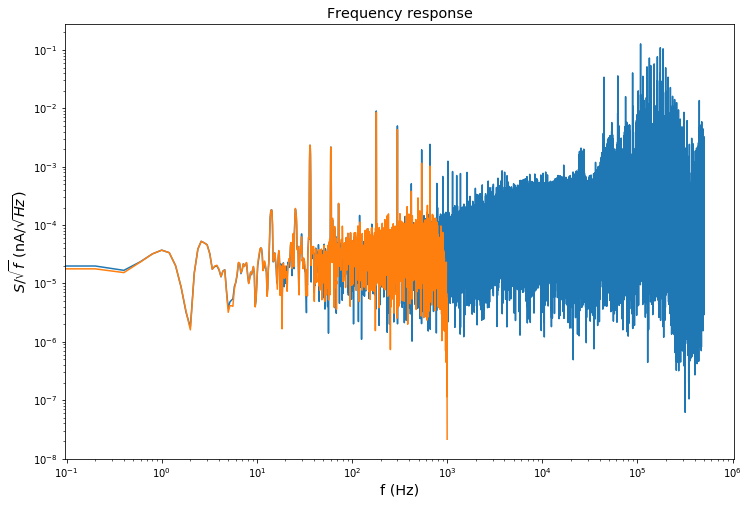

In [33]:
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response',fontsize='x-large')

Frequencies with higher values are:  [ 35.6  35.8  36.   36.2  36.4  36.6  36.8  59.4  59.6  59.8  60.   60.2
  60.4  60.6 179.4 179.6 179.8 180.  180.2 180.4 180.6 299.4 299.6 299.8
 300.  300.2 300.4 300.6 419.8 420.  539.4 539.6 539.8 540.  540.2 540.4
 659.6 659.8 660.  660.2 660.4]


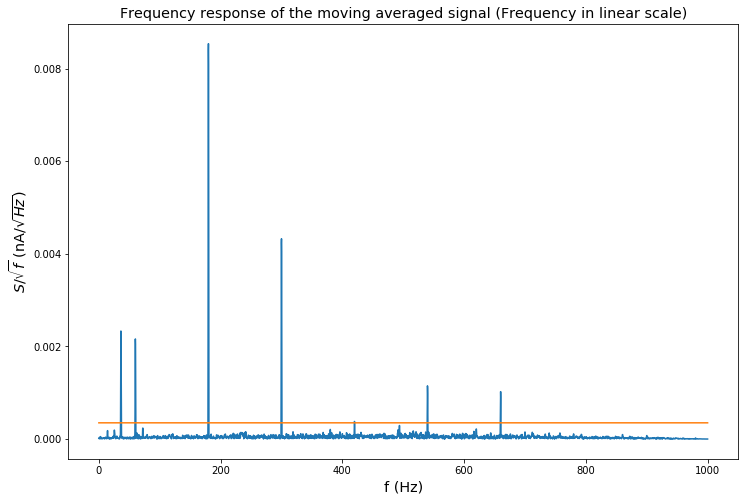

In [57]:
threshold_value = 0.00035
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.plot(f_desired, threshold_value*np.ones(f_desired.size))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the moving averaged signal (Frequency in linear scale)',fontsize='x-large')

positions = np.where(np.sqrt(II_den_desired)>=threshold_value)
print('Frequencies with higher values are: ', f_desired[positions])

            f= {35, 60, 180, 300, 420, 540, 660} Hz
            I can't explain why there is a peak at 35 Hz. The other frequencies are harmonics of 60 Hz.

## Initiating QDevil QDAC channel 1
Applying a sinusoidal wave, $v(t)= V_{max} \sin{2\pi f t}$ <br>
$V_{max}=10$ mV and $f=10$ Hz

In [1]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM5') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")
    print("Setting Channel 1 voltage range to 10 V")
    result = q.setVoltageRange(channel=1, theRange=10)

NameError: name 'serial' is not defined

In [60]:
with qdac.qdac('COM3') as q:
    q.restart()

In [67]:
with qdac.qdac('COM3') as q:
    print("Defines sinusoid function generator for generator 1 and starts it on channel 1")
    result = q.defineFunctionGenerator(generator=qdac.Generator.generator1, waveform=qdac.Waveform.sine, period=100, dutycycle=50)
    print("Result: %s" % result)
    q.setChannelOutput(channel=1, generator=qdac.Generator.generator1, amplitude=0.01, offset=0.0)

Defines sinusoid function generator for generator 1 and starts it on channel 1
Result: {'Period': 100.0, 'Repetitions': -1, 'Curvetype': 1, 'Trigger': 0}


## Collecting the current response with NIDAQ

In [70]:
gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()

## Plotting data
Input is a sinusoidal voltage

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


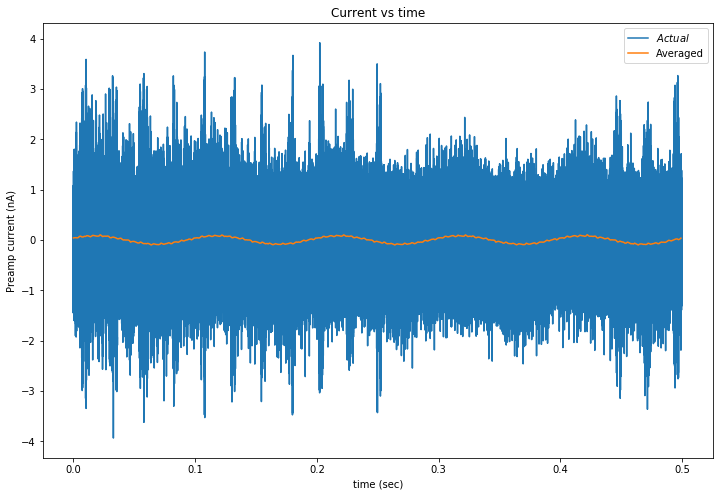

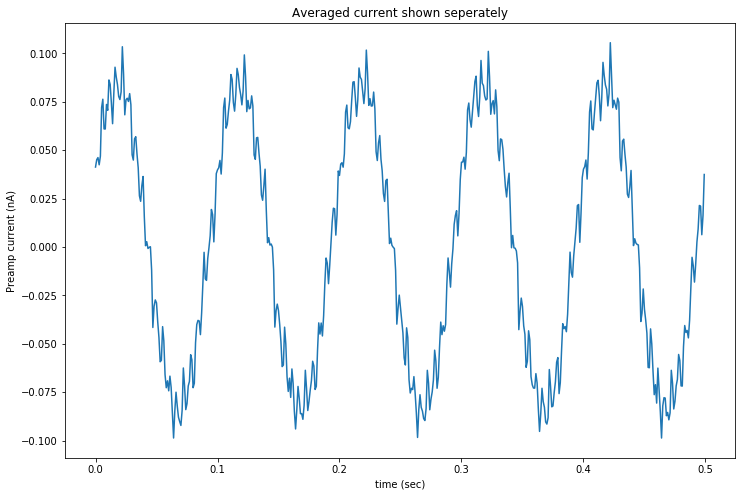

In [71]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

## Resistance calculation
V = 10 mvolt <br>
I = 0.1 nA<br>
$R= V/I $

In [73]:
V = 0.01
I = 0.1e-9
R = 1e-6*V/I
print('Resistance is: ', R, 'Mega Ohm')

Resistance is:  100.0 Mega Ohm


Text(0.5, 1.0, 'Frequency response of the actual signal')

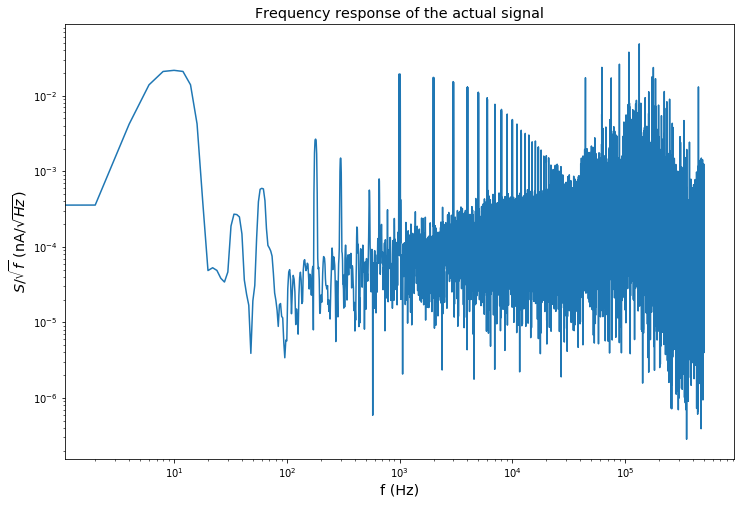

In [75]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

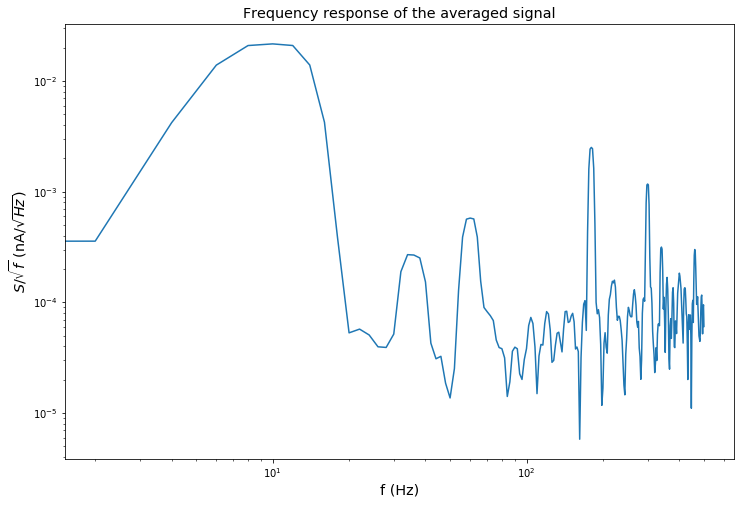

In [77]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response')

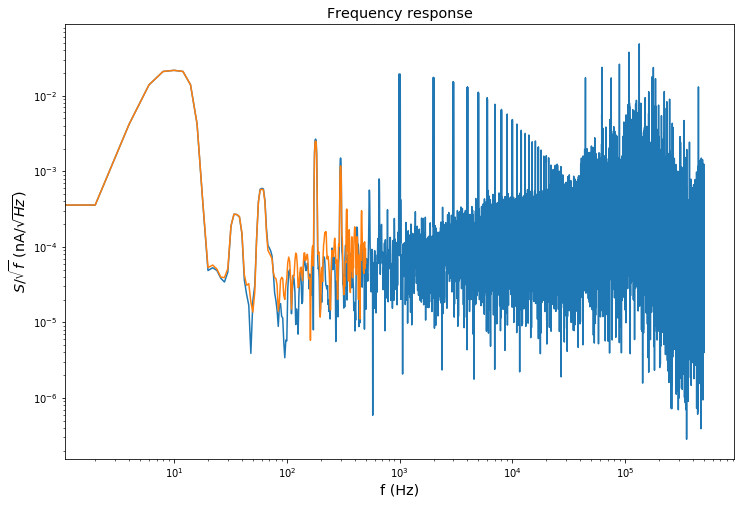

In [78]:
plt.figure(figsize=(12,8))
plt.loglog(f,np.sqrt(II_den))
plt.loglog(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal (Linear frequency scale)')

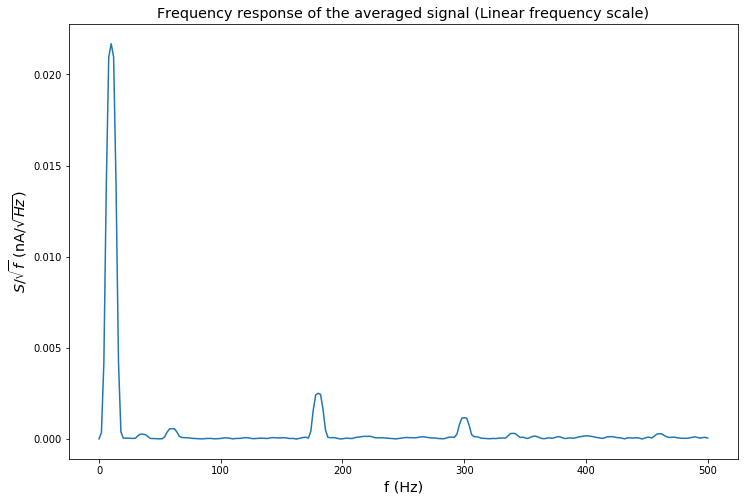

In [79]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal (Linear frequency scale)',fontsize='x-large')

Frequencies with higher values are:  [  4.   6.   8.  10.  12.  14.  16. 176. 178. 180. 182. 184. 298. 300.
 302.]


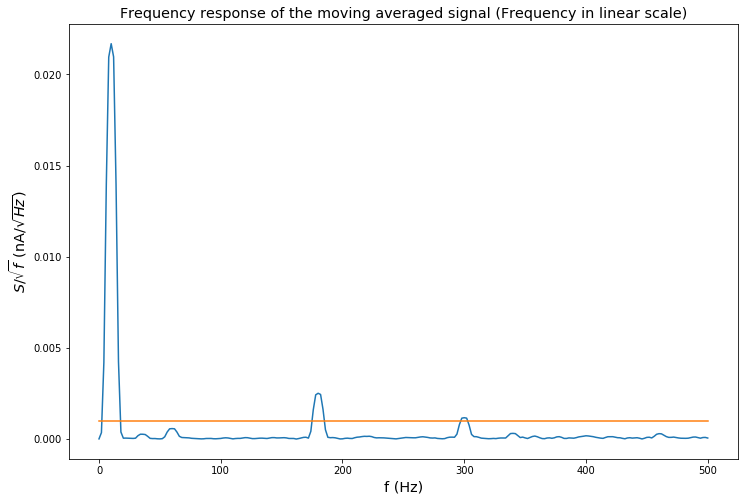

In [82]:
threshold_value = 0.001
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.plot(f_desired, threshold_value*np.ones(f_desired.size))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the moving averaged signal (Frequency in linear scale)',fontsize='x-large')

positions = np.where(np.sqrt(II_den_desired)>=threshold_value)
print('Frequencies with higher values are: ', f_desired[positions])

# Date: August 4, 2020

## Data acquisition

In [1]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()
    

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


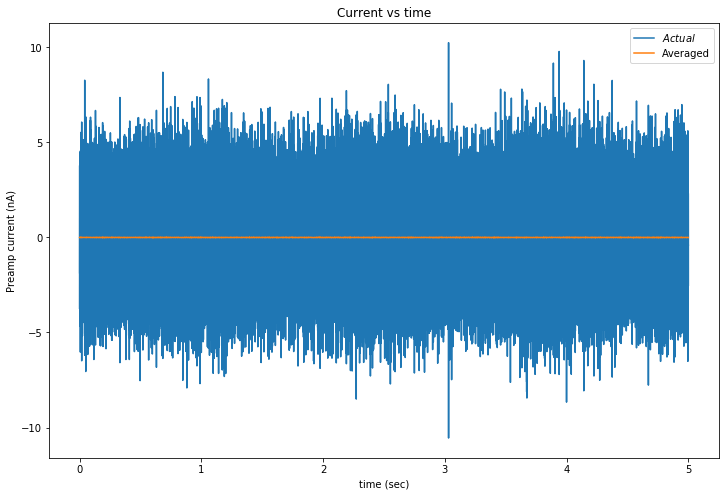

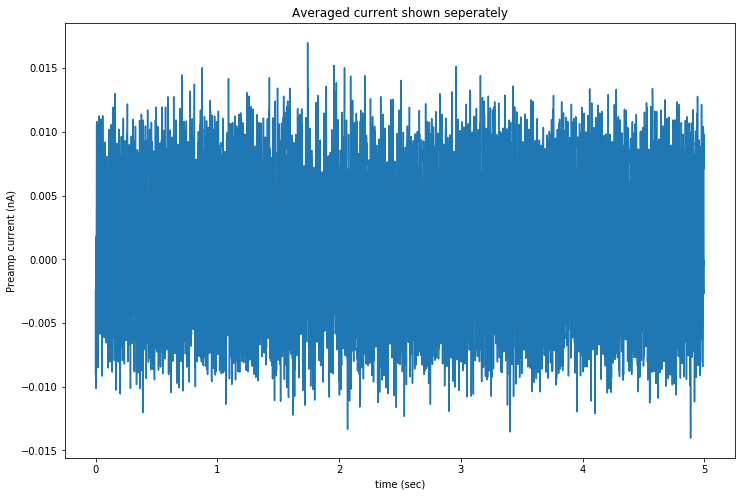

In [2]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

## Frequency response

Text(0.5, 1.0, 'Frequency response of the actual signal')

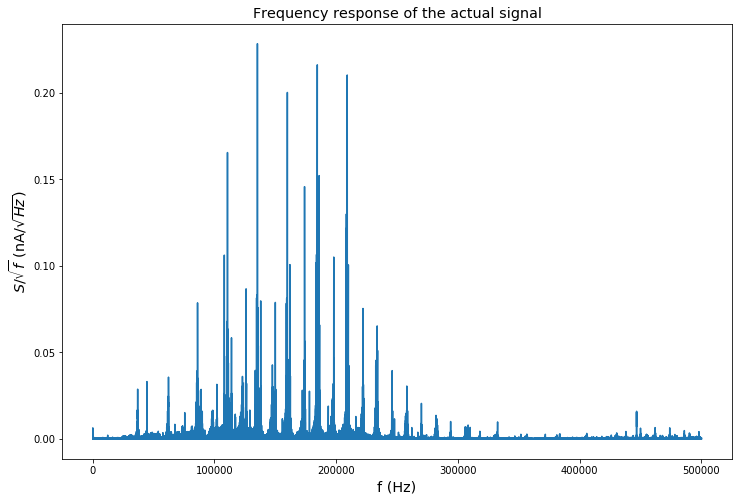

In [3]:
f,II_den=signal.periodogram(current_i,fs=rs_acqu,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.plot(f,np.sqrt(II_den))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the actual signal',fontsize='x-large')

Text(0.5, 1.0, 'Frequency response of the averaged signal')

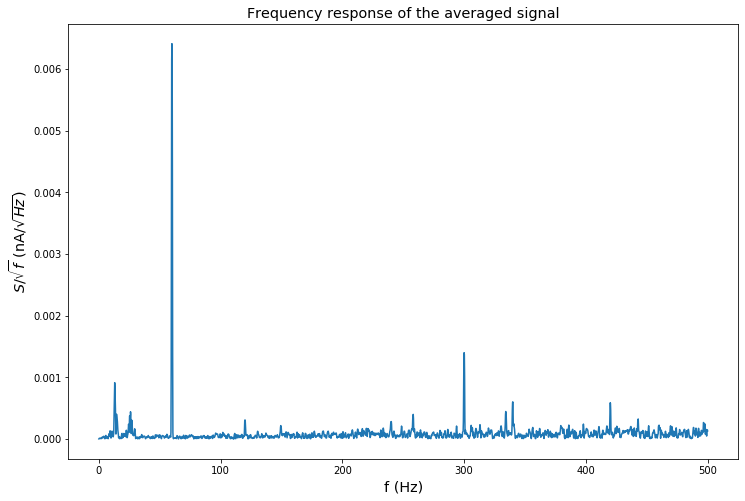

In [4]:
f_desired,II_den_desired=signal.periodogram(i_desired,fs=rs_desired,window='flattop',scaling='density',return_onesided=True)
plt.figure(figsize=(12,8))
plt.plot(f_desired,np.sqrt(II_den_desired))
plt.xlabel('f (Hz)', fontsize='x-large')
plt.ylabel('$S/\sqrt{f}$ (nA/$\sqrt{Hz}$)',fontsize='x-large')
plt.title('Frequency response of the averaged signal',fontsize='x-large')

## Initiating QDAC channel 1

Voltage sweeping from -10 mV to +10 mV

In [5]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM3') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")

QDAC Serial number: QDAC132401
Number of channels: 24
-----------------------------------------------


In [7]:
with qdac.qdac('COM3') as q:
    print('Voltage at channel 1 is: ', q.getDCVoltage(1), 'V')
    print('Voltage range is: ', q.getVoltageRange(1))

Voltage at channel 1 is:  -0.0 V
Voltage range is:  10.0


In [9]:
with qdac.qdac('COM3') as q:
    q.setVoltageRange(1, 1.0)
    print('Voltage range is: ', q.getVoltageRange(1))

Exception: 1V range not valid in the 100uA current range

In [10]:
with qdac.qdac('COM3') as q:
    q.setCurrentRange(1, 1e-6)
    q.setVoltageRange(1, 1.0)
    print('Voltage range is: ', q.getVoltageRange(1))

Voltage range is:  1.0


In [11]:
%whos

Variable            Type        Data/Info
-----------------------------------------
AcqType             EnumMeta    <enum 'AcquisitionType'>
II_den              ndarray     2500001: 2500001 elems, type `float64`, 20000008 bytes (19.07349395751953 Mb)
II_den_desired      ndarray     2501: 2501 elems, type `float64`, 20008 bytes
TermConfig          EnumMeta    <enum 'TerminalConfiguration'>
VERSION             str         1.21
acqu_task           Task        <object with id 2582307756808 (str() failed)>
current_i           ndarray     5000000: 5000000 elems, type `float64`, 40000000 bytes (38.14697265625 Mb)
f                   ndarray     2500001: 2500001 elems, type `float64`, 20000008 bytes (19.07349395751953 Mb)
f_desired           ndarray     2501: 2501 elems, type `float64`, 20008 bytes
gain                float       100000000.0
i_desired           ndarray     5000: 5000 elems, type `float64`, 40000 bytes
index               int32       4999
math                module      <module

In [13]:
number_of_data_points = 100
V = np.linspace(start= -10e-3, stop= 10e-3, num = number_of_data_points)
I = np.zeros(number_of_data_points)

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.01 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with qdac.qdac('COM3') as q:
    for i in np.arange(number_of_data_points):
        #setting the DC voltage
        q.setDCVoltage(1, V[i])
        
        #collecting data for V[i]
        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

            # Stop acquisition
            acqu_task.stop()
            
            # Averaging
            I[i]=np.mean(current_i)
        

## Ploting the I-V

Text(0.5, 1.0, 'I vs V')

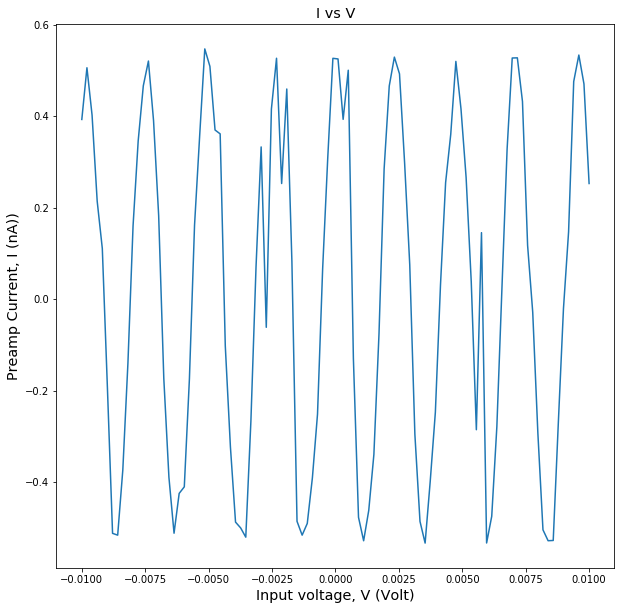

In [14]:
plt.figure(figsize=(10, 10))
plt.plot(V, I)
plt.xlabel('Input voltage, V (Volt)', fontsize='x-large')
plt.ylabel('Preamp Current, I (nA))',fontsize='x-large')
plt.title('I vs V',fontsize='x-large')

## Let's collect 0.1 sec of data for each voltage

In [15]:
number_of_data_points = 100
V = np.linspace(start= -10e-3, stop= 10e-3, num = number_of_data_points)
I = np.zeros(number_of_data_points)

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.1 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with qdac.qdac('COM3') as q:
    for i in np.arange(number_of_data_points):
        #setting the DC voltage
        q.setDCVoltage(1, V[i])
        
        #collecting data for V[i]
        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

            # Stop acquisition
            acqu_task.stop()
            
            # Averaging
            I[i]=np.mean(current_i)
     

Text(0.5, 1.0, 'I vs V')

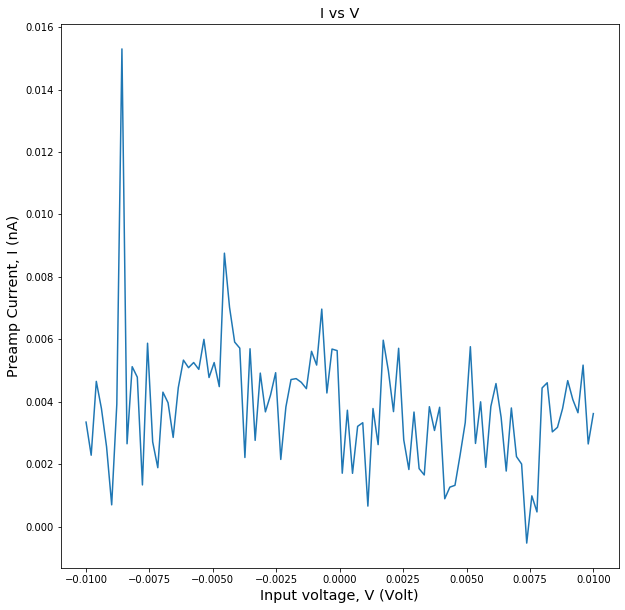

In [17]:
plt.figure(figsize=(10, 10))
plt.plot(V, I)
plt.xlabel('Input voltage, V (Volt)', fontsize='x-large')
plt.ylabel('Preamp Current, I (nA)',fontsize='x-large')
plt.title('I vs V',fontsize='x-large')

# August 25 data

In [1]:
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
%matplotlib inline

#Constant values

gain = 1e8 # gain of the preamps

# Data collection with NIDAQ at maximum sampling rate

rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 5 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)
t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


with nidaqmx.Task() as acqu_task:
    # Set acquisition channels and specs
    # Change the voltage range if necessary
    acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-1,max_val=1)
    acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

    # Start acquisition
    acqu_task.start()
    
    # Collect the data measured
    current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
    current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion

    # Stop acquisition
    acqu_task.stop()
    

Text(0.5, 0, 'time (sec)')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


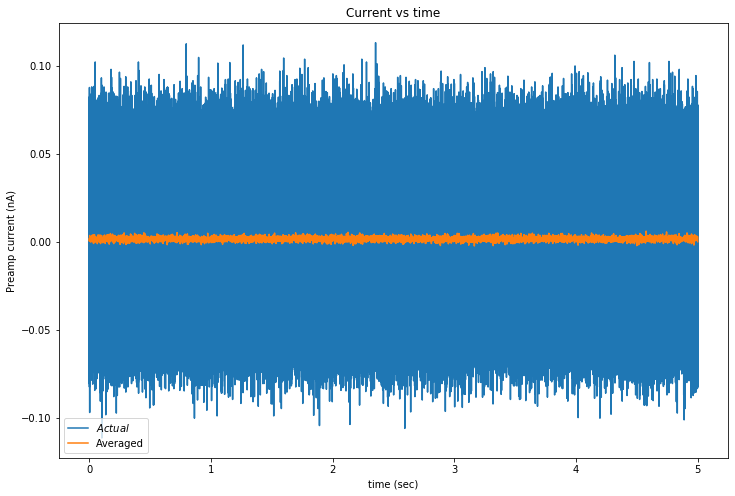

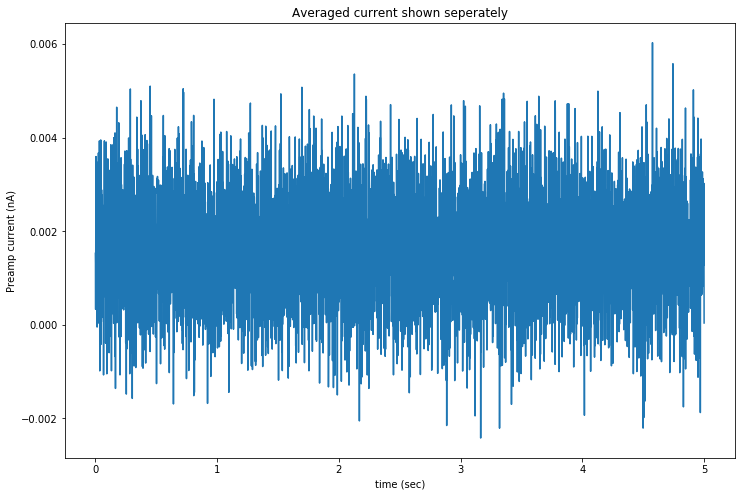

In [2]:
# Averaging to get a desired sampling rate (Similar to sampling rate conversion)

rs_desired = 1e3 #desired sampling rate
n_pointstoaverage = int(rs_acqu/rs_desired) # number of points to be averaged
ns_desired = int(rs_desired*t_acqu) # total number of points for the collected signal in the desired rate
t_desired = np.arange(start=0, stop=t_acqu, step=1/rs_desired)
i_desired = np.zeros(ns_desired)

for index in np.arange(ns_desired):
    i_desired[index] = current_i[index*n_pointstoaverage:(index+1)*n_pointstoaverage].mean()
    
plt.figure(figsize=(12,8))
plt.title('Current vs time')


plt.plot(t,current_i)
plt.plot(t_desired, i_desired)
plt.legend(['$Actual$', 'Averaged'])
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

plt.figure(figsize=(12,8))
plt.plot(t_desired, i_desired)
plt.title('Averaged current shown seperately')
plt.ylabel('Preamp current (nA)')
plt.xlabel('time (sec)')

In [3]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM3') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")
    print("Setting Channel 1 voltage range to 10 V")
    result = q.setVoltageRange(channel=1, theRange=10)

QDAC Serial number: QDAC132401
Number of channels: 24
-----------------------------------------------
Setting Channel 1 voltage range to 10 V


Setting Voltage at channel 1 is:  {'Voltage': -0.0, 'Digital': 27}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.6e-05, 'Digital': 31}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000133, 'Digital': 34}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.00021, 'Digital': 38}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000267, 'Digital': 41}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000343, 'Digital': 45}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000419, 'Digital': 49}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000477, 'Digital': 52}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000553, 'Digital': 56}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000629, 'Digital': 60}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000686, 'Digital': 63}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000763, 'Digital': 67}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.00082, 'Digital': 70}  V
Setting Voltage at channel 1 is:  {'Voltage':

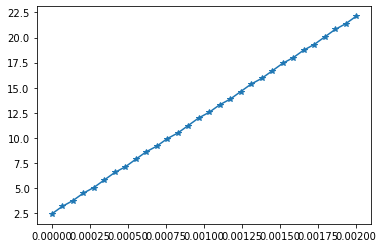

In [16]:
N = 30
voltages = np.linspace(0, 2e-3, num=N)
currents = np.zeros(N)

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

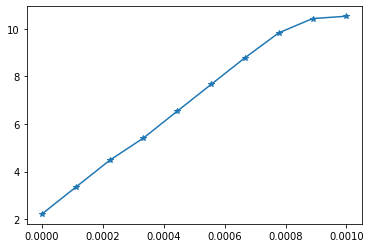

In [11]:
plt.figure()
plt.plot(voltages, currents, '-*')

In [7]:
print(currents)

[1.05411426 1.05411426 1.05411426 1.05411426 1.05411426 1.05411426
 1.05411426 1.05411426 1.05411426 1.05411426]


In [15]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

101477.64981982649


In [ ]:
N = 30
voltages = np.linspace(0, 2e-3, num=N)
currents = np.zeros(N)

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 7e-06, 'Digital': 62}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.3e-05, 'Digital': 65}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.2e-05, 'Digital': 69}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.8e-05, 'Digital': 72}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.1e-05, 'Digital': 78}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.9e-05, 'Digital': 82}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.5e-05, 'Digital': 85}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.2e-05, 'Digital': 88}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.7e-05, 'Digital': 95}  V
Setting Voltage at channel 1 is:

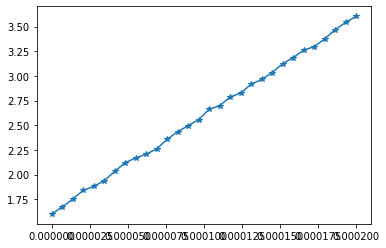

In [19]:
N = 30
voltages = np.linspace(0, 200e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [20]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

99810.09802009865


In [1]:
N = 30
voltages = np.linspace(0, 200e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

NameError: name 'np' is not defined

In [5]:
# qdacExample.py
# Copyright QDevil ApS, 2018, 2019
VERSION = "1.21"

import qdac
import random
import math

with qdac.qdac('COM5') as q:
    print("QDAC Serial number: %s" % q.getSerialNumber())
    print("Number of channels: %d" % q.getNumberOfChannels())

    print("-----------------------------------------------")
    print("Setting Channel 1 voltage range to 10 V")
    result = q.setVoltageRange(channel=1, theRange=10)

NameError: name 'serial' is not defined

Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': 0.0, 'Digital': 59}  V
Setting Voltage at channel 1 is:  {'Voltage': 7e-06, 'Digital': 62}  V
Setting Voltage at channel 1 is:  {'Voltage': 1.3e-05, 'Digital': 65}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.2e-05, 'Digital': 69}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.8e-05, 'Digital': 72}  V
Setting Voltage at channel 1 is:  {'Voltage': 3.4e-05, 'Digital': 75}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.1e-05, 'Digital': 78}  V
Setting Voltage at channel 1 is:  {'Voltage': 4.9e-05, 'Digital': 82}  V
Setting Voltage at channel 1 is:  {'Voltage': 5.5e-05, 'Digital': 85}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.2e-05, 'Digital': 88}  V
Setting Voltage at channel 1 is:  {'Voltage': 6.8e-05, 'Digital': 91}  V
Setting Voltage at channel 1 is:  {'Voltage': 7.7e-05, 'Digital': 95}  V
Setting Voltage at channel 1 is:

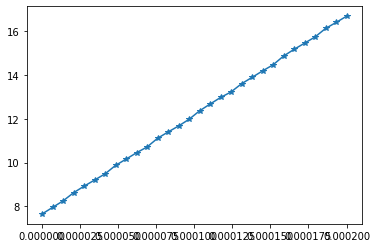

In [23]:
N = 30
voltages = np.linspace(0, 200e-6, num=N)
currents = np.zeros(N)

with qdac.qdac('COM3') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM3') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev1/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM3') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

In [22]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

22674.50408484394


0
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.

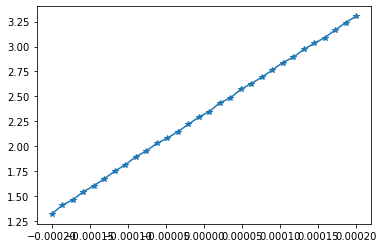

In [17]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V res100Kohm, gain=1e6 \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)



In [2]:
pip install pyserial

Note: you may need to restart the kernel to use updated packages.


In [16]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

202431.90141442994


1
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.

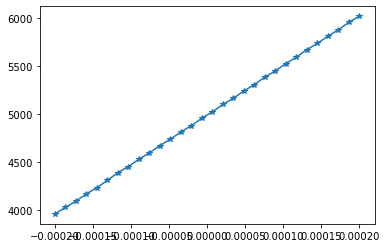

In [18]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (23,26); gain=1e6 \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [19]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

194.230706856376


2
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.

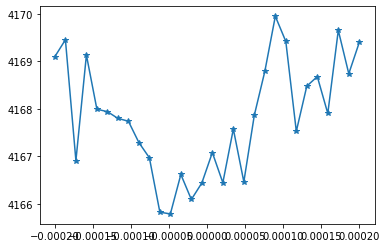

In [20]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (23,28); gain=1e6 \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [21]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

1347296.4181597526


3
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000125, 'Digital': 0}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.8e-05, 'Digital': 36}  V
Setting Voltage at channel 1 is:  {'Voltage': 2.8e-05, 'Digital': 72}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000104, 'Digital': 108}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000178, 'Digital': 143}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000255, 'Digital': 179}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000331, 'Digital': 215}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000407, 'Digital': 251}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000484, 'Digital': 287}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000558, 'Digital': 322}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000634, 'Digital': 358}  V

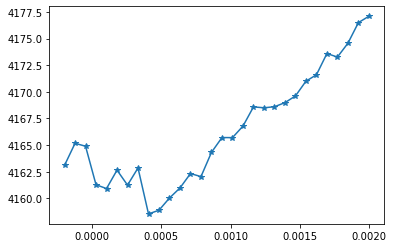

In [22]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 2e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (23,28); gain=1e6; changed the excitation range to (-200uv-->2mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

4
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.004001, 'Digital': 1046747}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003725, 'Digital': 1046877}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003448, 'Digital': 1047008}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003172, 'Digital': 1047138}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002897, 'Digital': 1047268}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002621, 'Digital': 1047398}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002346, 'Digital': 1047528}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002068, 'Digital': 1047659}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001792, 'Digital': 1047789}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001517, 'Digital': 1047919}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001241, 'Digital': 1048049}  V
Setting Voltage at c

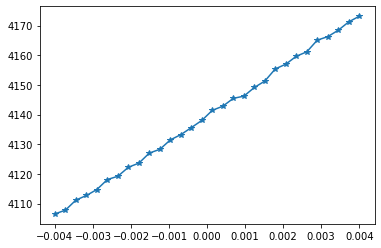

In [23]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-4e-3, 4e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (23,28); gain=1e6; changed the excitation range to (-4mV-->4mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [24]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

120073.37836389012


5
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.004001, 'Digital': 1046747}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003725, 'Digital': 1046877}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003448, 'Digital': 1047008}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003172, 'Digital': 1047138}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002897, 'Digital': 1047268}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002621, 'Digital': 1047398}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002346, 'Digital': 1047528}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002068, 'Digital': 1047659}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001792, 'Digital': 1047789}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001517, 'Digital': 1047919}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001241, 'Digital': 1048049}  V
Setting Voltage at c

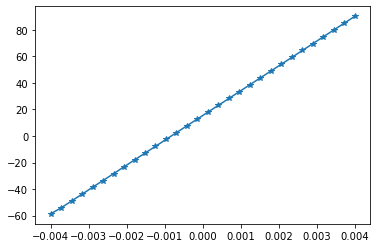

In [25]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-4e-3, 4e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (23,24); gain=1e6; changed the excitation range to (-4mV-->4mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [26]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

53693.62400013912


6
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.004001, 'Digital': 1046747}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003725, 'Digital': 1046877}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003448, 'Digital': 1047008}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003172, 'Digital': 1047138}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002897, 'Digital': 1047268}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002621, 'Digital': 1047398}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002346, 'Digital': 1047528}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002068, 'Digital': 1047659}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001792, 'Digital': 1047789}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001517, 'Digital': 1047919}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001241, 'Digital': 1048049}  V
Setting Voltage at c

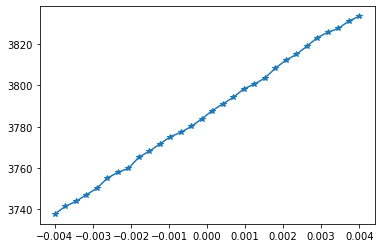

In [27]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-4e-3, 4e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (28,26); gain=1e6; changed the excitation range to (-4mV-->4mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [28]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

83664.06938838077


7
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.

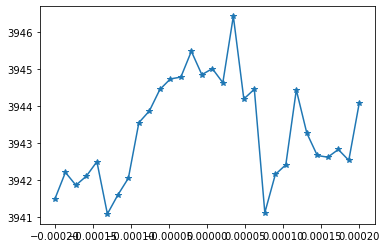

In [29]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (28,26); gain=1e6; changed the excitation range to (-200uV-->200uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

8
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.

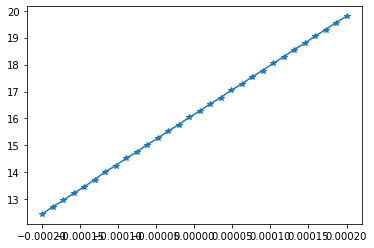

In [31]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e7 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (28,26); gain=1e7; changed the excitation range to (-200uV-->200uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [32]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

54515.314216385486


9
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4.

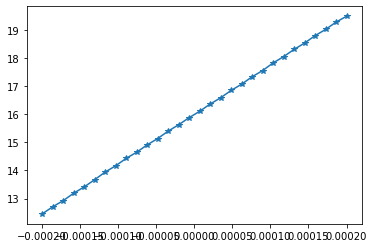

In [34]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (28,26); gain=1e8; changed the excitation range to (-200uV-->200uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [35]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

56895.72162730435


10
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4

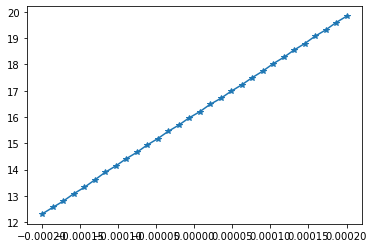

In [36]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (28,23); gain=1e8; changed the excitation range to (-200uV-->200uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [37]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

53245.57489719687


11
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4

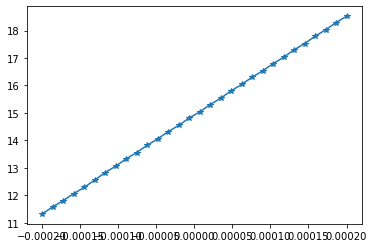

In [38]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V Leakage sample,Between (24,23); gain=1e8; changed the excitation range to (-200uV-->200uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

In [39]:
R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

55558.66321842393


12
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.000201, 'Digital': 1048540}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000186, 'Digital': 1048547}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000173, 'Digital': 1048553}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000159, 'Digital': 1048560}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000146, 'Digital': 1048566}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000131, 'Digital': 1048573}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000116, 'Digital': 4}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000103, 'Digital': 10}  V
Setting Voltage at channel 1 is:  {'Voltage': -8.9e-05, 'Digital': 17}  V
Setting Voltage at channel 1 is:  {'Voltage': -7.6e-05, 'Digital': 23}  V
Setting Voltage at channel 1 is:  {'Voltage': -6.1e-05, 'Digital': 30}  V
Setting Voltage at channel 1 is:  {'Voltage': -4

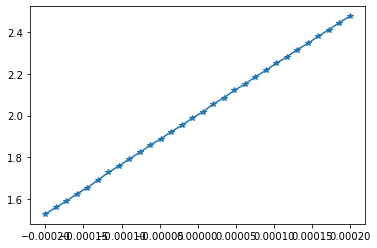

In [40]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-200e-6, 200e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e8; changed the excitation range to (-200uV-->200uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

13
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -2.1e-05, 'Digital': 49}  V
Setting Voltage at channel 1 is:  {'Voltage': -1.9e-05, 'Digital': 50}  V
Setting Voltage at channel 1 is:  {'Voltage': -1.7e-05, 'Digital': 51}  V
Setting Voltage at channel 1 is:  {'Voltage': -1.7e-05, 'Digital': 51}  V
Setting Voltage at channel 1 is:  {'Voltage': -1.4e-05, 'Digital': 52}  V
Setting Voltage at channel 1 is:  {'Voltage': -1.2e-05, 'Digital': 53}  V
Setting Voltage at channel 1 is:  {'Voltage': -1.2e-05, 'Digital': 53}  V
Setting Voltage at channel 1 is:  {'Voltage': -1e-05, 'Digital': 54}  V
Setting Voltage at channel 1 is:  {'Voltage': -8e-06, 'Digital': 55}  V
Setting Voltage at channel 1 is:  {'Voltage': -8e-06, 'Digital': 55}  V
Setting Voltage at channel 1 is:  {'Voltage': -6e-06, 'Digital': 56}  V
Setting Voltage at channel 1 is:  {'Voltage': -4e-06, 'Digital': 57}  V
Setting Voltage at ch

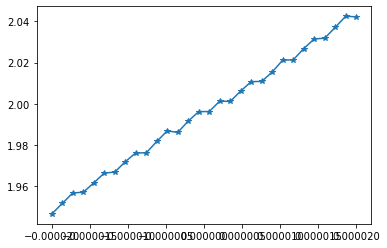

In [41]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-20e-6, 20e-6, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e8; changed the excitation range to (-20uV-->20uV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

14
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.001, 'Digital': 1048163}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000932, 'Digital': 1048195}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000862, 'Digital': 1048228}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000792, 'Digital': 1048261}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000724, 'Digital': 1048293}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000654, 'Digital': 1048326}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000587, 'Digital': 1048358}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000517, 'Digital': 1048391}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000449, 'Digital': 1048423}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000379, 'Digital': 1048456}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000311, 'Digital': 1048488}  V
Setting Voltage at cha

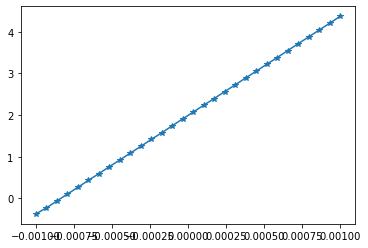

In [42]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-1e-3, 1e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e8; changed the excitation range to (-1mV-->1mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

with open(os.path.join(path,filename), 'ab') as file:
    np.savetxt(file,data,header=header,delimiter=',')    
    
filenum=int(filenum)+1

with open('filenum.txt', 'w') as f:
   f.write('%d' % filenum)

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

15
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.001, 'Digital': 1048163}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000932, 'Digital': 1048195}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000862, 'Digital': 1048228}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000792, 'Digital': 1048261}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000724, 'Digital': 1048293}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000654, 'Digital': 1048326}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000587, 'Digital': 1048358}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000517, 'Digital': 1048391}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000449, 'Digital': 1048423}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000379, 'Digital': 1048456}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000311, 'Digital': 1048488}  V
Setting Voltage at cha

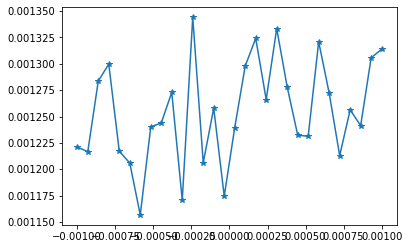

In [44]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-1e-3, 1e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e8; changed the excitation range to (-1mV-->1mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'False'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

15
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.004655, 'Digital': 1046438}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00431, 'Digital': 1046601}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003965, 'Digital': 1046764}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003621, 'Digital': 1046926}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003276, 'Digital': 1047089}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00293, 'Digital': 1047252}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002587, 'Digital': 1047414}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002242, 'Digital': 1047577}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001896, 'Digital': 1047740}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001551, 'Digital': 1047903}  V
Setting Voltage at ch

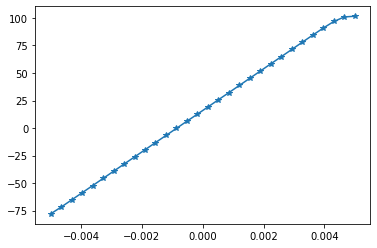

In [45]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 5e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (23,28); gain=1e8; changed the excitation range to (-5mV-->5mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

16
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.004484, 'Digital': 1046519}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003965, 'Digital': 1046764}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003448, 'Digital': 1047008}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00293, 'Digital': 1047252}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002413, 'Digital': 1047496}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001896, 'Digital': 1047740}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001379, 'Digital': 1047984}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000862, 'Digital': 1048228}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000345, 'Digital': 1048472}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channe

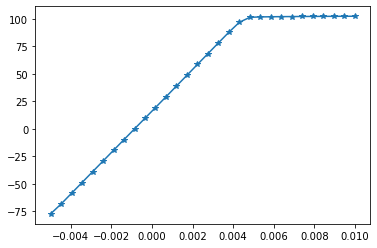

In [46]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 10e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e8 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (23,28); gain=1e8; changed the excitation range to (-5mV-->10mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

17
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.004484, 'Digital': 1046519}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003965, 'Digital': 1046764}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003448, 'Digital': 1047008}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00293, 'Digital': 1047252}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002413, 'Digital': 1047496}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001896, 'Digital': 1047740}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001379, 'Digital': 1047984}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000862, 'Digital': 1048228}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000345, 'Digital': 1048472}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000172, 'Digital': 140}  V
Setting Voltage at channe

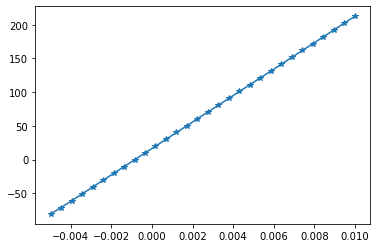

In [47]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 10e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e7 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (23,28); gain=1e7; changed the excitation range to (-5mV-->10mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

18
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003104, 'Digital': 1047170}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001208, 'Digital': 1048065}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000689, 'Digital': 384}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.002586, 'Digital': 1279}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.004482, 'Digital': 2174}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.006379, 'Digital': 3069}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.008276, 'Digital': 3964}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.010172, 'Digital': 4859}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.012069, 'Digital': 5754}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.013966, 'Digital': 6649}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.0158

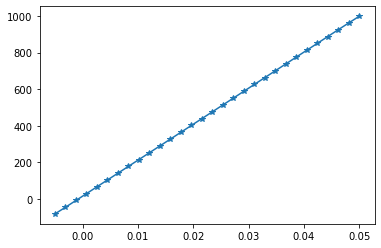

In [48]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 50e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e7 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (23,28); gain=1e7; changed the excitation range to (-5mV-->50mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

19
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003104, 'Digital': 1047170}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001208, 'Digital': 1048065}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.000689, 'Digital': 384}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.002586, 'Digital': 1279}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.004482, 'Digital': 2174}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.006379, 'Digital': 3069}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.008276, 'Digital': 3964}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.010172, 'Digital': 4859}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.012069, 'Digital': 5754}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.013966, 'Digital': 6649}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.0158

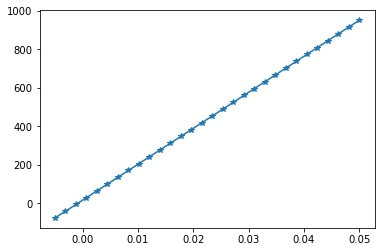

In [49]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 50e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e7 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (22,24); gain=1e7; changed the excitation range to (-5mV-->50mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

20
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.012414, 'Digital': 5917}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.029828, 'Digital': 14134}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.047241, 'Digital': 22351}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.064656, 'Digital': 30569}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.082069, 'Digital': 38786}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.099482, 'Digital': 47003}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.116897, 'Digital': 55221}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.134311, 'Digital': 63438}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.151724, 'Digital': 71655}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.169139, 'Digital': 79873}  V
Setting Voltage at channel 1 is:  {'Voltage': 0.18

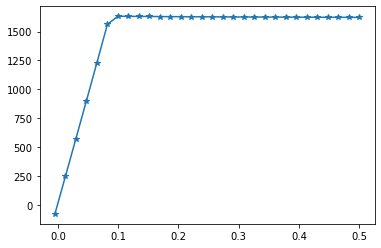

In [50]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 500e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (22,24); gain=1e6; changed the excitation range to (-5mV-->500mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

22
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.004655, 'Digital': 1046438}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00431, 'Digital': 1046601}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003965, 'Digital': 1046764}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003621, 'Digital': 1046926}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003276, 'Digital': 1047089}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00293, 'Digital': 1047252}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002587, 'Digital': 1047414}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002242, 'Digital': 1047577}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001896, 'Digital': 1047740}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001551, 'Digital': 1047903}  V
Setting Voltage at ch

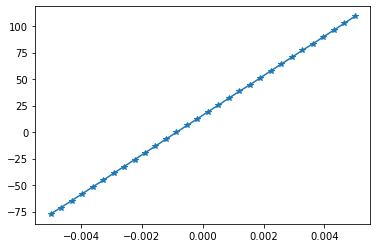

In [52]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 5e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e5 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (22,24); gain=1e5; changed the excitation range to (-5mV-->500mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'False'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

22
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.5, 'Digital': 812692}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.482587, 'Digital': 820909}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.465172, 'Digital': 829127}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.447759, 'Digital': 837344}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.430346, 'Digital': 845561}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.41293, 'Digital': 853779}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.395517, 'Digital': 861996}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.378104, 'Digital': 870213}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.360689, 'Digital': 878431}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.343276, 'Digital': 886648}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.325863, 'Digital': 894865}  V
Setting Voltage at channel 1 is:  {'

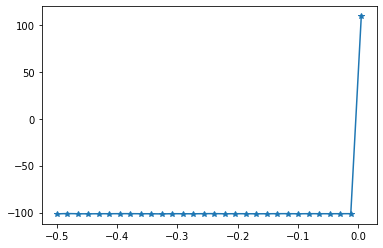

In [53]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-500e-3, 5e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e5 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (22,24); gain=1e5; changed the excitation range to (-500mV-->5mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

23
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.5, 'Digital': 812692}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.482587, 'Digital': 820909}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.465172, 'Digital': 829127}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.447759, 'Digital': 837344}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.430346, 'Digital': 845561}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.41293, 'Digital': 853779}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.395517, 'Digital': 861996}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.378104, 'Digital': 870213}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.360689, 'Digital': 878431}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.343276, 'Digital': 886648}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.325863, 'Digital': 894865}  V
Setting Voltage at channel 1 is:  {'

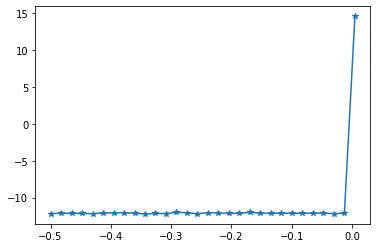

In [54]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-500e-3, 5e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e5 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e5; changed the excitation range to (-500mV-->5mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

24
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.5, 'Digital': 812692}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.482587, 'Digital': 820909}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.465172, 'Digital': 829127}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.447759, 'Digital': 837344}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.430346, 'Digital': 845561}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.41293, 'Digital': 853779}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.395517, 'Digital': 861996}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.378104, 'Digital': 870213}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.360689, 'Digital': 878431}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.343276, 'Digital': 886648}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.325863, 'Digital': 894865}  V
Setting Voltage at channel 1 is:  {'

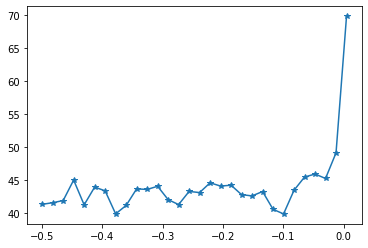

In [55]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-500e-3, 5e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e3 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e3; changed the excitation range to (-500mV-->5mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

25
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.049999, 'Digital': 1025041}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.046551, 'Digital': 1026668}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.043103, 'Digital': 1028295}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.039655, 'Digital': 1029922}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.036208, 'Digital': 1031549}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.032758, 'Digital': 1033177}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.02931, 'Digital': 1034804}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.025862, 'Digital': 1036431}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.022414, 'Digital': 1038058}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.018966, 'Digital': 1039685}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.015518, 'Digital': 1041312}  V
Setting Voltage at c

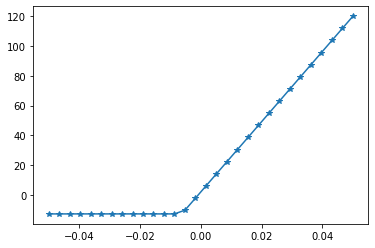

In [56]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-50e-3, 50e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e6; changed the excitation range to (-50mV-->50mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

26
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.001, 'Digital': 1048163}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000932, 'Digital': 1048195}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000862, 'Digital': 1048228}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000792, 'Digital': 1048261}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000724, 'Digital': 1048293}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000654, 'Digital': 1048326}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000587, 'Digital': 1048358}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000517, 'Digital': 1048391}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000449, 'Digital': 1048423}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000379, 'Digital': 1048456}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.000311, 'Digital': 1048488}  V
Setting Voltage at cha

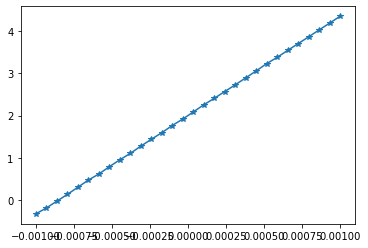

In [57]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-1e-3, 1e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e6; changed the excitation range to (-1mV-->1mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

27
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.004655, 'Digital': 1046438}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00431, 'Digital': 1046601}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003965, 'Digital': 1046764}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003621, 'Digital': 1046926}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003276, 'Digital': 1047089}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00293, 'Digital': 1047252}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002587, 'Digital': 1047414}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002242, 'Digital': 1047577}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001896, 'Digital': 1047740}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001551, 'Digital': 1047903}  V
Setting Voltage at ch

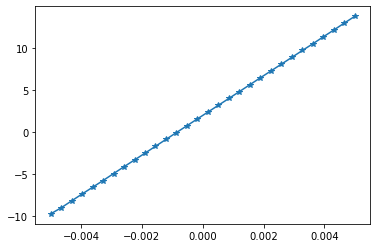

In [58]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)




N = 30
voltages = np.linspace(-5e-3, 5e-3, num=N)
currents = np.zeros(N)




with qdac.qdac('COM5') as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(1, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(1, 1))

for i in np.arange(N):
    with qdac.qdac('COM5') as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(1, voltages[i]), ' V')
        gain = 1e6 # gain of the preamps

        # Data collection with NIDAQ at maximum sampling rate

        rs_acqu = 1e6 # sampling rate in Hz
        t_acqu = 0.1 # acquisition time in second
        ns_acqu = int(rs_acqu*t_acqu)
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan("Dev2/ai0",terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac('COM5') as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(1, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e6; changed the excitation range to (-5mV-->5mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

save_data = 'True'

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print(R*1e9)

28
Setting Current range at channel 1 to 1uA:  1e-06
Setting Voltage range at channel 1 to 1 V:  1.0
Setting Voltage at channel 1 is:  {'Voltage': -0.005001, 'Digital': 1046275}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.004655, 'Digital': 1046438}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00431, 'Digital': 1046601}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003965, 'Digital': 1046764}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003621, 'Digital': 1046926}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.003276, 'Digital': 1047089}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.00293, 'Digital': 1047252}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002587, 'Digital': 1047414}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.002242, 'Digital': 1047577}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001896, 'Digital': 1047740}  V
Setting Voltage at channel 1 is:  {'Voltage': -0.001551, 'Digital': 1047903}  V
Setting Voltage at ch

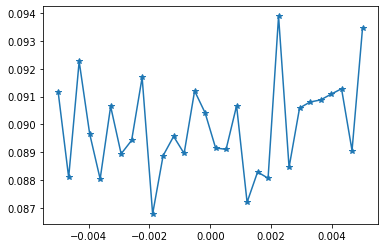

In [62]:
import os
import nidaqmx
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import qdac
from nidaqmx.constants import AcquisitionType as AcqType
from nidaqmx.constants import TerminalConfiguration as TermConfig
from datetime import datetime


%matplotlib inline


os.chdir('/Users/Measurement2/OneDrive/GroupShared/Data/Qsim/20200902/Leakage')

with open('filenum.txt', 'r') as f:
  filenum = f.readline()

print(filenum)


# All inputs below

#Data acquisition settings

NIDAQ_device_id="Dev2/ai0" #Device id and analog input id
gain = 1e6 # gain of the preamps
rs_acqu = 1e6 # sampling rate in Hz
t_acqu = 0.1 # acquisition time in second
ns_acqu = int(rs_acqu*t_acqu)

# QDAC settings

QDAC_port_id='COM5' # srial port number
Channel_id=1 # QDAC channel number

# I-V plot settings

N = 30 # number of data points on I-V plot
min_voltage = -5e-3 # minimum voltage applied from QDAC
max_voltage = 5e-3 # maximum voltage applied from QDAC

# Data saving settings

save_data = 'False' # 'True' or 'False'
header="Meas info: I-V 100kOhm res,Between (3,17); gain=1e6; changed the excitation range to (-5mV-->5mV) \n  "
header+="TMC~4K"
header+=str(date)+"\n"
header+= "x=V(V), y=I(nA)\n"


# Main code

voltages = np.linspace(min_voltage, max_voltage, num=N)
currents = np.zeros(N)

with qdac.qdac(QDAC_port_id) as q:
        print('Setting Current range at channel 1 to 1uA: ', q.setCurrentRange(Channel_id, 1e-6))
        print('Setting Voltage range at channel 1 to 1 V: ', q.setVoltageRange(Channel_id, 1))

for i in np.arange(N):
    with qdac.qdac(QDAC_port_id) as q:
        print('Setting Voltage at channel 1 is: ', q.setDCVoltage(Channel_id, voltages[i]), ' V')
        
        t = np.arange(start=0, stop=t_acqu, step=1/rs_acqu)


        with nidaqmx.Task() as acqu_task:
            # Set acquisition channels and specs
            # Change the voltage range if necessary
            acqu_task.ai_channels.add_ai_voltage_chan(NIDAQ_device_id,terminal_config=TermConfig.DIFFERENTIAL,min_val=-10,max_val=10)
            acqu_task.timing.cfg_samp_clk_timing(rs_acqu,sample_mode=AcqType.FINITE,samps_per_chan=ns_acqu)

            # Start acquisition
            acqu_task.start()

            # Collect the data measured
            current_i = acqu_task.read(number_of_samples_per_channel=ns_acqu)
            current_i = 1e9*np.array(current_i)/gain # voltage to actual current (in nA) conversion
            

            # Stop acquisition
            acqu_task.stop()
            
            currents[i] = current_i.mean()

with qdac.qdac(QDAC_port_id) as q:
        print('All done! Setting Voltage at channel 1 to zero', q.setDCVoltage(Channel_id, 0), ' V')
            
plt.figure()
plt.plot(voltages, currents, '-*')

x=voltages
y=currents
data = np.column_stack((x, y))
date=datetime.now()


path=os.getcwd()
print(os.getcwd())

filename='dat'+str(filenum)+'.dat'
print(filename)

if save_data=="True" :
    with open(os.path.join(path,filename), 'ab') as file:
        np.savetxt(file,data,header=header,delimiter=',')    
    
    filenum=int(filenum)+1

    with open('filenum.txt', 'w') as f:
       f.write('%d' % filenum)
    print('Data saved!')

R = (voltages[-1]-voltages[0])/(currents[-1]-currents[0])
print('Resistance is: ',R*1e9, 'Ohm')